# Applied Social Network Analysis in Python

## Chapter 2-1. Clustering Coefficient
* **[Lecture video](https://www.coursera.org/lecture/python-social-network-analysis/clustering-coefficient-ZhNvi)**

<hr>

**We are going to focus on how to measure the network.**

### Triadic Closure
Triadic Closure : The tendency for people who share connections in a social network to become connected<br>
Triadic Closure would say that those edges that closed triangles are good candidates for edges that may show up next.<br>
So, all the red edges form closed triangles, and so, these are good candidates for edges that may show up

**But How can we measure the prevalence of triadic closure in a network?**<br>
We don't have a timestamp always, and don't know the ordering which edges come into network.

In [1]:
# Import NetworkX and set matplotlib enable to print in ipython notebook
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

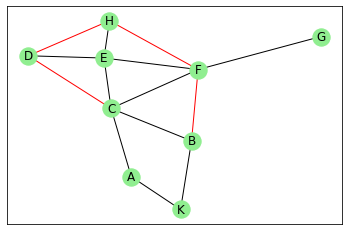

In [2]:
# Define of Graph Class
G = nx.Graph()

# make connections with its own color.
# Red means a good candidates for edges that may show up next.
# (node1, node2, color)
Triadic_example = [('A', 'A', 'black'), 
                   ('A', 'C', 'black'), 
                   ('A', 'K', 'black'), 
                   ('B', 'K', 'black'), 
                   ('B', 'C', 'black'), 
                   ('C', 'F', 'black'), 
                   ('C', 'E', 'black'), 
                   ('E', 'F', 'black'), 
                   ('E', 'D', 'black'), 
                   ('E', 'H', 'black'), 
                   ('F', 'G', 'black'), 
                   #('I', 'J', 'black'), 
                   ('B', 'F', 'red'), 
                   ('C', 'D', 'red'), 
                   ('D', 'H', 'red'), 
                   ('H', 'F', 'red'), 
                  ]

# Add edges with its relationship.
for n1, n2, r in Triadic_example:
    G.add_edge(n1, n2, role=r)
    

# Frame layout setting
pos = nx.spring_layout(G, seed=201703) # Frame Layout setting to use

# coloring differently by its own relationship
for edge, role in nx.get_edge_attributes(G, 'role').items():
    nx.draw_networkx_edges(G, pos, edgelist=[edge], edge_color = role) # draw edges with given color

# add nodes with its labels
nx.draw_networkx_nodes(G,pos, node_color='lightgreen')
nx.draw_networkx_labels(G,pos)

plt.show()

<hr>

### Local Clustering Coefficient

we want to know whether Triadic Closure is present in this network, whether it has lots of triangles or not. <br>
And so, what we're going to be talking about in this video is, how can we measure the prevalence of Triadic Closure in a network<br>

 * **Local Clustering Coefficient of a node** : Fraction of pairs of the node's friends that are friends with each other. <br>
  ( measuring Clustering from the point of view of a single node )

Compute the local clustering coefficient of node C by below :

$$
{number\ of\ C's\ friends\ who\ are\ friends \over number\ of\ pairs\ of\ C's\ friends}
$$

$$
number\ of\ C's\ friends = d_c = 4\ (the\ "degree"\ of\ C)
$$

$$
number\ of\ pairs\ of\ C's\ friends = {d_c(d_c-1) \over 2} = {12\over2} = 6
$$

$$
number\ of\ pairs\ of\ C's\ friends\ who\ are\ friends = 2
$$

$$
\therefore\ Local\ Clustering\ Coefficient\ of\ C = {2\over6}={1\over3}
$$

Sometimes, there is the node who has 0 pairs of friends like I and J. <br>
In this situation, We will assume that the Local clsutering coefficient of a node of degree less than 2 to be 0 (and NetworkX also does).

#### Local Clustering Coefficient in NetworkX
```python
G = nx.Graph()
G.add_edges_from([('A','K'),('A','B'),('A','C'),('B','C'),('B','K'),('C','E'),('C','F'),('D','E'),('E','F'),('E','H'),('F','G'),('I','J'),])

nx.clustering(G,'F')
```
> out : 0.3333333333333333

```python
nx.clustering(G,'A')
```
> out : 0.6666666666666666

```python
nx.clustering(G,'J')
```
> out : 0.0

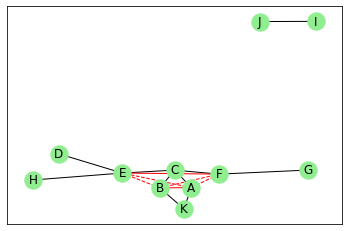

In [3]:
# Define of Graph Class
G = nx.Graph()

# make connections with its own color.
# (node1, node2, status)
Triadic_example = [('A', 'A', 'connected'), 
                   ('A', 'C', 'connected'), 
                   ('A', 'K', 'connected'), 
                   ('B', 'K', 'connected'), 
                   ('B', 'C', 'connected'), 
                   ('C', 'F', 'connected'), 
                   ('C', 'E', 'connected'), 
                   ('E', 'F', 'connected'), 
                   ('E', 'D', 'connected'), 
                   ('E', 'H', 'connected'), 
                   ('F', 'G', 'connected'), 
                   ('I', 'J', 'connected'), 
                   ('A', 'B', 'C_friend'), # C's friends who are friends
                   ('E', 'F', 'C_friend'), # C's friends who are friends
                   ('A', 'F', 'virtual'), 
                   ('A', 'E', 'virtual'), 
                   ('B', 'E', 'virtual'), 
                   ('B', 'F', 'virtual'), ]

# Role Info is consist of colors and style for each role
role_info = {'connected' : ('black', 'solid'),
             'C_friend' : ('red', 'solid'),
             'virtual' : ('red', 'dashed'),
            }

# Add edges with its relationship.
for n1, n2, r in Triadic_example:
    G.add_edge(n1, n2, role=r)
    

# Frame layout setting
pos = nx.spring_layout(G, seed=201703) # Frame Layout setting to use

# coloring differently by its own relationship
for edge, role in nx.get_edge_attributes(G, 'role').items():
    color, style = role_info[role]
    nx.draw_networkx_edges(G, pos, edgelist=[edge], edge_color = color, style = style) # draw edges with given color

# add nodes with its labels
nx.draw_networkx_nodes(G,pos, node_color='lightgreen')
nx.draw_networkx_labels(G,pos)

plt.show()

<hr>

### Global Clustering Coefficient

Measuring clustering on the whole network : 
* [ Approach 1 ] : Average local clustering coefficient over all nodes in the graph.<br>

  It is quiet simple, all you need to do is just sum all cluster coefficient of each nodes.

  ```python
  G = nx.Graph()
  G.add_edges_from([('A','K'),('A','B'),('A','C'),('B','C'),('B','K'),('C','E'),('C','F'),('D','E'),('E','F'),('E','H'),('F','G'),('I','J'),])
  nx.average_clustering(G)
  ```
  > out : 0.28787878787878785

* [ Approach 2 ] : Percentage of "open triads" that are triangles in a network.
  * Open triads : three nodes with two edges between them. and we can count it as "3 open triads (3nodes)"
  * Closed triads : three nodes with three edges between them, which is called "triangle" usually. and we can count it as "3 closed triads (3nodes)"
  
  <br>
  So, let's calculate how many triangles, which means how many possible open triads, the graph has.
  
  you can get the second approch measurement called **`Transitivity`** .

  $$
  Transitivity = {3 \times Number\ of\ closed\ triads \over Number\ of\ open\ triads}
  $$

  you can get Transitivity by networkx using following : 
  
  ```python
  nx.transitivity(G)
  ```
  > out : 0.4090909090909091

<hr>

### **Transitivity** vs **Average Clustering Coefficient**

Both measure the tendency for edges to form triangles. 
Transitivity wieghts nodes with large degree higher.

The Below case shows following properties :
* Most nodes have hight LCC
* the high degree node has low LCC

Network Average Clustering Coefficient : 0.93006993006993<br>
Network Transitivity : 0.23076923076923078

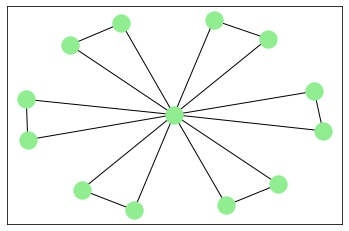

Network Average Clustering Coefficient : 0.93006993006993
Network Transitivity : 0.23076923076923078


In [4]:
# Define of Graph Class
G = nx.Graph()

# add edges into graph.
Edge_list = [
    ('A','B'),('A','M'),('B','M'),
    ('C','D'),('C','M'),('D','M'),
    ('E','F'),('E','M'),('F','M'),
    ('G','H'),('G','M'),('H','M'),
    ('I','J'),('I','M'),('J','M'),
    ('K','L'),('K','M'),('L','M'),
]

for n1, n2, in Edge_list:
    G.add_edge(n1, n2)
    
# Frame layout setting
pos = nx.spring_layout(G, seed=201703) # Frame Layout setting to use

# Drawing
nx.draw_networkx_nodes(G, pos, node_color='lightgreen')
nx.draw_networkx_edges(G, pos)
plt.show()

# Get Average Clustering Coefficient and Transitivity
avg_cluster_coef = nx.average_clustering(G)
G_transitivity = nx.transitivity(G)

print(f'Network Average Clustering Coefficient : {avg_cluster_coef}')
print(f'Network Transitivity : {G_transitivity}')

The Below case shows following properties :
* Most nodes have low LCC
* High degree node have high LCC

Network Average Clustering Coefficient : 0.25<br>
Network Transitivity : 0.8571428571428571

In [5]:
# Define of Graph Class
G = nx.Graph()

# add edges into graph.
Edge_list = [
    ('A','B'),('A','C'),('A','D'),('A','E'),
    ('B','C'),('B','D'),('B','E'),
    ('C','D'),('C','E'),('D','E'),
    ('1','2'),('1','3'),
    ('4','5'),('4','6'),
    ('7','8'),('7','9'),
    ('10','11'),('10','12'),
    ('13','14'),('13','15'),
]

for n1, n2, in Edge_list:
    G.add_edge(n1, n2)
    
# Get Average Clustering Coefficient and Transitivity
avg_cluster_coef = nx.average_clustering(G)
G_transitivity = nx.transitivity(G)

print(f'Network Average Clustering Coefficient : {avg_cluster_coef}')
print(f'Network Transitivity : {G_transitivity}')

Network Average Clustering Coefficient : 0.25
Network Transitivity : 0.8571428571428571
